House Price Prediction using Custom Linear Regression Model
Target Variable: SalePrice

In [ ]:
def linearRegression():
    pass

In [2]:
# Core
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Path of the file to read.
file_path = r'train.csv'

# Load data into a pandas DataFrame. Note: 1st column is ID
home_data = pd.read_csv(file_path, index_col=0)

In [10]:
df = home_data
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
#(rows,cols)
df.shape

(1460, 80)

In [16]:
# number of numerical columns
print(len(df.select_dtypes(exclude=['object']).columns))
#names of numerical columns
print(df.select_dtypes(exclude=['object']).columns)

37
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [17]:
# number of categorical columns
print(len(df.select_dtypes(include=['object']).columns))
#names of categorical columns
print(df.select_dtypes(include=['object']).columns)

43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [18]:
# Generate descriptive statistics.
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.
#describe numerical dataset

df.select_dtypes(exclude=['object']).describe().round(decimals=2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [20]:
#describe categorical attributes
df.select_dtypes(include=['object']).describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [29]:
# Count the missing values for each column
missing_values_count = df.isnull().sum()

# Display the count of missing values for each column
count_missing_cols = 0
for col in missing_values_count.index:
    if missing_values_count[col] > 0:
        print(col, missing_values_count[col])
        count_missing_cols += 1

print("Number of columns having missing values: %d" % count_missing_cols)

LotFrontage 259
Alley 1369
MasVnrType 872
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406
Number of columns having missing values: 19


Out of 80 columns, 19 columns have missing values
Total number of rows 1460.
Feature Alley,MasVnrType,FireplaceQu,PoolQc,Fence,MiscFeature these features will be removed from dataset.(MCAR  Missing Completely at Random )
Rest fo the missing columns will be imputed. for numerical dataset use mean imputation and for categorical mode imputation.

In [ ]:
# Specify the columns to drop
columns_to_drop = ['Alley', 'MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature',]  # Replace with your column names

# Drop the specified columns from the DataFrame
df = df.drop(columns=columns_to_drop)


In [35]:
# DF size
print(df.shape)


(1460, 74)


After droping :
5 numerical columns has missing values
8 categorical columns has missing values
Lot Frontage feature has 259 missing values most among rest of the missing values columns. It is a numerical feature. n = numerical else categorical
LotFrontage 259  n
MasVnrArea 8     n 
BsmtQual 37       
BsmtCond 37        
BsmtExposure 38  
BsmtFinType1 37 n
BsmtFinType2 38 n
Electrical 1           
GarageType 81   
GarageYrBlt 81   n
GarageFinish 81  
GarageQual 81    
GarageCond 81

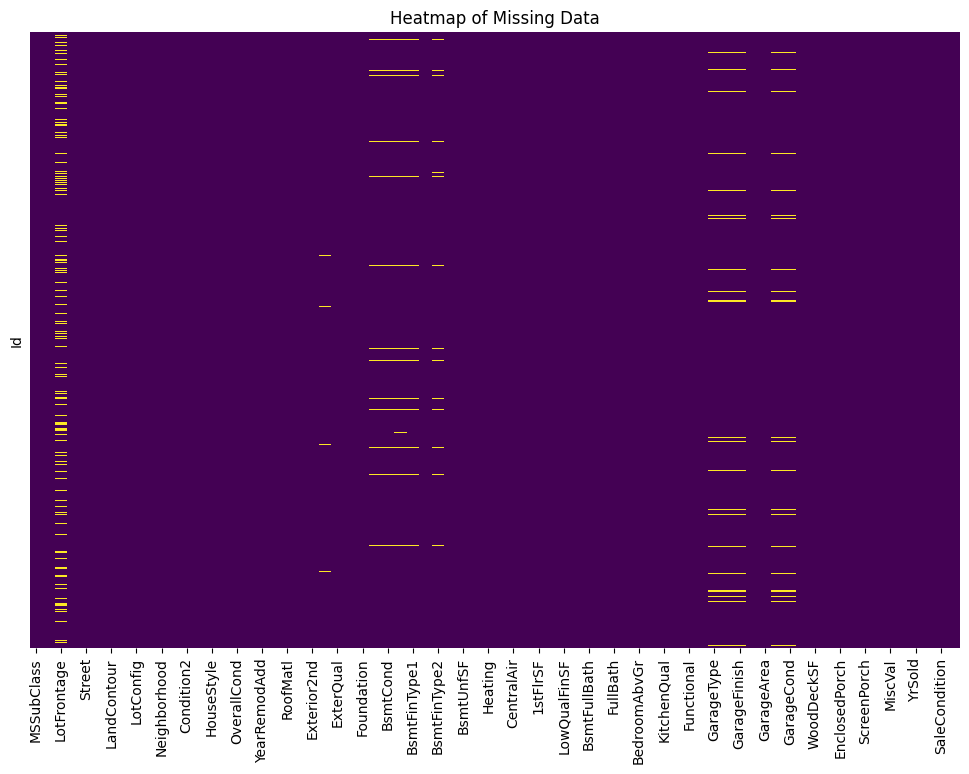

In [ ]:
#checking position of missing values between features hoping to find some 
# linear relation between features using heatmap.

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

# Add a title to the heatmap
plt.title('Heatmap of Missing Data')

# Display the heatmap
plt.show()




From the hit map it is clear that there is a relationship between following group of features

BsmtQual 37       
BsmtCond 37        
BsmtExposure 38  
BsmtFinType1 37 n
BsmtFinType2 38 n
-----------------
GarageType 81   
GarageYrBlt 81   n
GarageFinish 81  
GarageQual 81    
GarageCond 81   

(MAR) (missing values is related to observed data but not the missing value itself.(or we can say not related to unobserved data.))
Above group missing values can be found by their 
----------------------------
Following missing value features can be imputed by mean and mode.
These features comes under MNAR(missing values does not depend on observed as well as unobserved data)
LotFrontage 259  n
MasVnrArea 8     n 
Electrical 1     



In [42]:
from sklearn.impute import SimpleImputer

# Create a DataFrame with the first group of data
data_first_group = df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

# Initialize the imputer with the strategy of your choice (e.g., 'most_frequent', 'mean', 'median')
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the data
imputed_first_group = imputer.fit_transform(data_first_group)

# Convert the imputed data back to a DataFrame
imputed_first_group_df = pd.DataFrame(imputed_first_group, columns=data_first_group.columns)

# Replace the original data with the imputed data
df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = imputed_first_group_df


In [44]:
# Create a DataFrame with the second group of data
data_second_group = df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']]

# Initialize the imputer with the strategy of your choice
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the data
imputed_second_group = imputer.fit_transform(data_second_group)

# Convert the imputed data back to a DataFrame
imputed_second_group_df = pd.DataFrame(imputed_second_group, columns=data_second_group.columns)

# Replace the original data with the imputed data
df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']] = imputed_second_group_df


In [46]:
data_third_group_1 = df[['LotFrontage','MasVnrArea']]
data_third_group_2 = df[['Electrical']]
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='most_frequent')
imputed_third_group_1 = imputer1.fit_transform(data_third_group_1)
imputed_third_group_2 = imputer2.fit_transform(data_third_group_2)
imputed_third_group_df_1 = pd.DataFrame(imputed_third_group_1, columns=data_third_group_1.columns)
imputed_third_group_df_2 = pd.DataFrame(imputed_third_group_2, columns=data_third_group_2.columns)
df[['LotFrontage','MasVnrArea']] = imputed_third_group_df_1
df[['Electrical']] = imputed_third_group_df_2

In [53]:
# Count the missing values for each column
missing_values_count = df.isnull().sum()

# Display the count of missing values for each column
count_missing_cols = 0
for col in missing_values_count.index:
    if missing_values_count[col] > 0:
        print(col, missing_values_count[col])
        count_missing_cols += 1

print("Number of columns having missing values: %d" % count_missing_cols)

Number of columns having missing values: 0


In [ ]:
#1 row has been removed.
# Identify rows with missing values
rows_with_missing = df[df.isnull().any(axis=1)]

# Display the rows with missing values
print("Rows with missing values:")
print(rows_with_missing)

# Get the indices of the rows with missing values
indices_to_remove = rows_with_missing.index

# Remove the rows with missing values
df = df.drop(index=indices_to_remove)

# Reset the DataFrame index (optional)
df = df.reset_index(drop=True)

# Display the first few rows of the modified DataFrame to verify
print(df.head())


Rows with missing values:
      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
1460          20       RL          NaN     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
Id                                  ...                                       
1460    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
Id                                                                        
1460        0       0       6    2008        WD         Normal    147500  

[1 rows x 74 columns]
   MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         80.0     8450   Pave      Reg         Lvl   
1          20       RL         68.0     9600   Pave      Reg         Lvl   
2          60       RL

In [54]:
# Count the missing values for each column
missing_values_count = df.isnull().sum()

# Display the count of missing values for each column
count_missing_cols = 0
for col in missing_values_count.index:
    if missing_values_count[col] > 0:
        print(col, missing_values_count[col])
        count_missing_cols += 1

print("Number of columns having missing values: %d" % count_missing_cols)

Number of columns having missing values: 0


In [55]:
#checking for duplicate rows.
# Find duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 74 columns]


There are no duplicate rows.

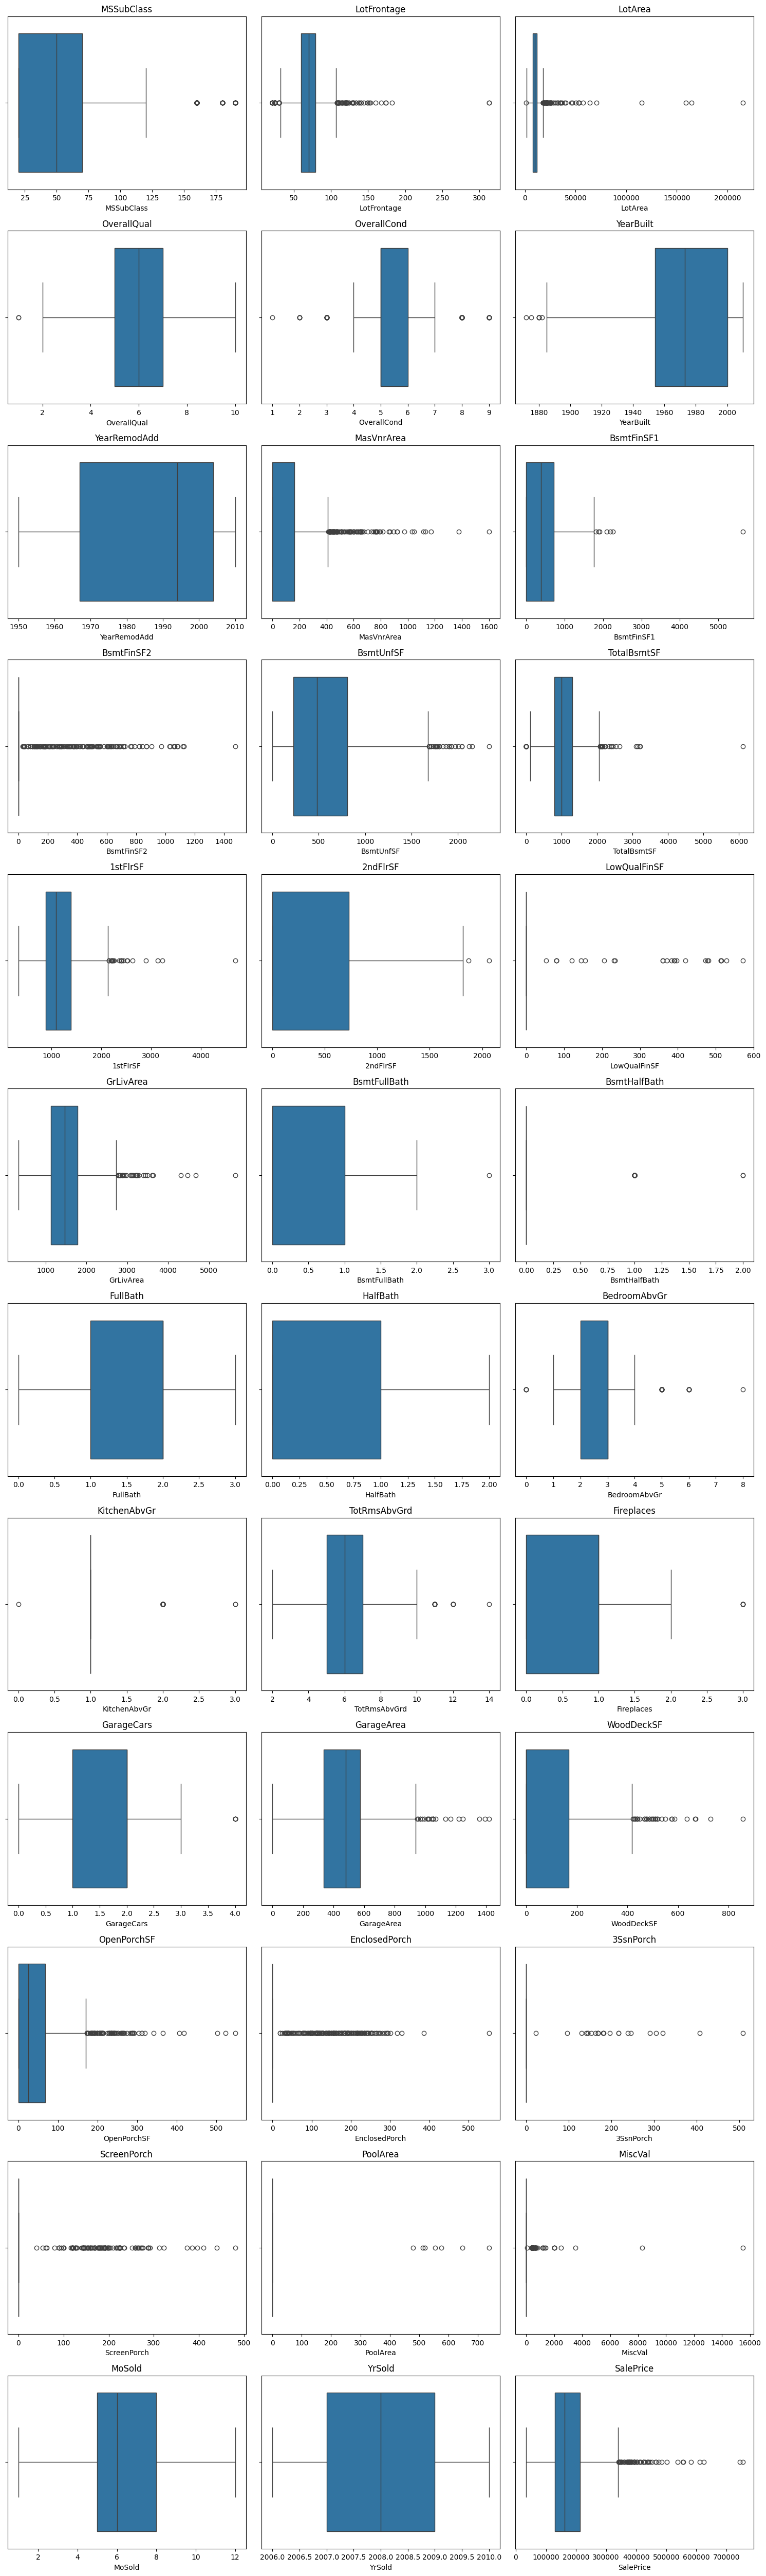

In [57]:


# Select only numerical columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
# or numerical_features = df.select_dtypes(exclude=['objects']).columns
# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=len(numerical_features)//3 + 1, ncols=3, figsize=(15, len(numerical_features)*1.5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate box plots for each numerical feature
for i, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [62]:
# Iterate through categorical columns and print their value counts
for col in df.select_dtypes(include=['object']).columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")


Value counts for MSZoning:
MSZoning
RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


Value counts for Street:
Street
Pave    1453
Grvl       6
Name: count, dtype: int64


Value counts for LotShape:
LotShape
Reg    924
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


Value counts for LandContour:
LandContour
Lvl    1310
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


Value counts for Utilities:
Utilities
AllPub    1458
NoSeWa       1
Name: count, dtype: int64


Value counts for LotConfig:
LotConfig
Inside     1051
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


Value counts for LandSlope:
LandSlope
Gtl    1381
Mod      65
Sev      13
Name: count, dtype: int64


Value counts for Neighborhood:
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards     99
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSid